In [1]:
""" Simple Python ETL Pipeline example """
import pandas as pd
import requests
from sqlalchemy import create_engine

In [2]:
def extract():
    """
    This API extracts data from: http://universities.hipolabs.com
    """
    API_URL = "http://universities.hipolabs.com/search?country=United+States"
    data = requests.get(API_URL).json()
    return data

def transform(data:dict) -> pd.DataFrame:
    """ Transforms the data into the desired structure and filters """
    df = pd.DataFrame(data)
    print(f"The total number of Universities in this API are: {len(data)}")
    df = df[df["name"].str.contains("Cloud")]
    print(f"The number of Universities in Minnesota: {len(df)}")
    df['domains'] = [','.join(map(str,l)) for l in df['domains']]
    df['web_pages'] = [','.join(map(str,l)) for l in df['web_pages']]
    df = df.reset_index(drop=True)
    return df[["domains","country","web_pages","name"]]

def load(df:pd.DataFrame)-> None:
    """ Loads data into an sqlite data base """
    disk_engine = create_engine('sqlite:///my_lite_store.db')
    df.to_sql('mn_uni',disk_engine,if_exists='replace')


In [3]:
data = extract()
df = transform(data)
load(df)

The total number of Universities in this API are: 2308
The number of Universities in Minnesota: 3


In [4]:
df

,domains,country,web_pages,name
0,stcloudstate.edu,United States,http://www.stcloudstate.edu/,Saint Cloud State University
1,cloud.edu,United States,http://www.cloud.edu,Cloud County Community College
2,sctcc.edu,United States,http://www.sctcc.edu,St Cloud Technical and Community College


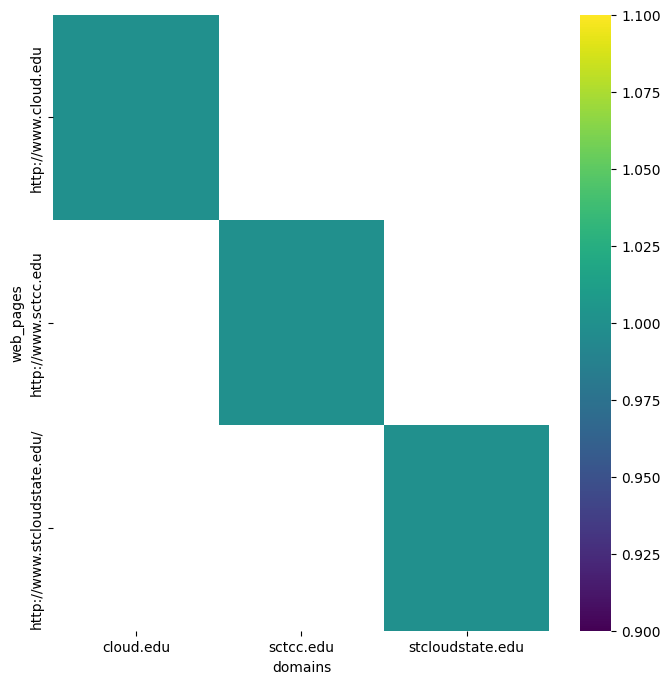

In [7]:
# @title domains vs web_pages

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['web_pages'].value_counts()
    for x_label, grp in df.groupby('domains')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('domains')
_ = plt.ylabel('web_pages')

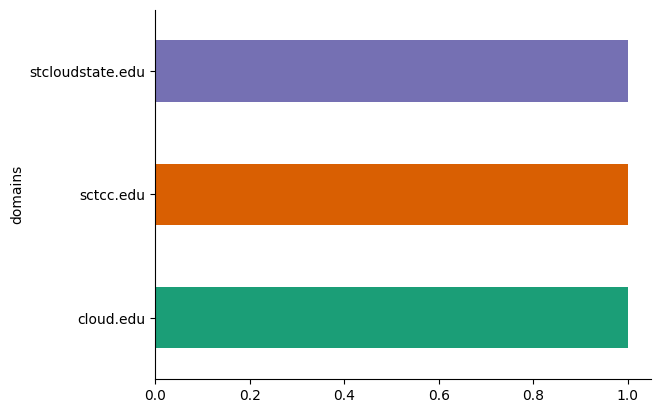

In [5]:
# @title domains

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('domains').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)